# Notebook for making summary statistics for rock magnetic data

In [1]:
import pmagpy.rockmag as rmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import local data in MagIC format
In this demonstration we will be using local data.

The data is from the following publication:
- Jackson, M. and Swanson-Hysell, N.L. (2012), Rock Magnetism of Remagnetized Carbonate Rocks: Another Look, In: Elmore, R. D., Muxworthy, A. R., Aldana, M. M. and Mena, M., eds., Remagnetization and Chemical Alteration of Sedimentary Rocks, Geological Society of London Special Publication, 371, https://doi.org/10.1144/SP371.3.

In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = '../example_data/Jackson2012'

# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('16460', directory=dir_path)
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path, print_progress=False)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the measurements table
measurements = contribution.tables['measurements'].df
measurements = measurements.dropna(axis=1, how='all')
specimens = contribution.tables['specimens'].df


Download successful. File saved to: ../example_data/Jackson2012/magic_contribution_16460.txt
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/contribution.txt
5  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/locations.txt
8  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/sites.txt
51  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/samples.txt
186  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/specimens.txt
4758  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


## filter for VSM rock magnetic data (Mr, Ms,Bcr, Bc) 

In [3]:
specimens.head()

,citations,description,experiments,hyst_bc,hyst_bc_offset,hyst_mr_mass,hyst_ms_mass,hyst_xhf,instrument_codes,meas_orient_phi,...,rem_bcr,rem_hirm_mass,rem_mr_mass,rem_sratio,rem_sratio_back,result_quality,sample,specimen,volume,weight
specimen name,,,,,,,,,,,,,,,,,,,,,
09-27,This study,None,IRM-VSM1-4231,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,0.0,...,0.0448,0.0,0.003193,0.0,0.1,g,09-27,09-27,0.000004,0.00738
09-27,This study,None,IRM-VSM1-4231,0.01059,0.000015,0.003193,0.01086,6.732000e-08,IRM-VSM1,0.0,...,NaN,NaN,NaN,NaN,NaN,g,09-27,09-27,0.000004,0.00738
10-23,This study,None,IRM-VSM1-4232,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,0.0,...,0.0399,0.0,0.004520,0.0,0.1,g,10-23,10-23,0.000004,0.00785
10-23,This study,None,IRM-VSM1-4232,0.00455,0.000046,0.004520,0.02597,-1.511000e-08,IRM-VSM1,0.0,...,NaN,NaN,NaN,NaN,NaN,g,10-23,10-23,0.000004,0.00785
11-29,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,None,11-29,11-29,0.000005,0.00901


## Option 1: filter for individual specimen data and plot them

- One has more flexibility to make a custom plot 
- However, the user has to specify the row numbers that contain each of the attributes

In [4]:
specimen_name = '09-27'
example_specimen_data = specimens[specimens['specimen'] == specimen_name].reset_index()
example_specimen_data

,specimen name,citations,description,experiments,hyst_bc,hyst_bc_offset,hyst_mr_mass,hyst_ms_mass,hyst_xhf,instrument_codes,...,rem_bcr,rem_hirm_mass,rem_mr_mass,rem_sratio,rem_sratio_back,result_quality,sample,specimen,volume,weight
0,09-27,This study,None,IRM-VSM1-4231,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,...,0.0448,0.0,0.003193,0.0,0.1,g,09-27,09-27,0.000004,0.00738
1,09-27,This study,None,IRM-VSM1-4231,0.01059,0.000015,0.003193,0.01086,6.732000e-08,IRM-VSM1,...,NaN,NaN,NaN,NaN,NaN,g,09-27,09-27,0.000004,0.00738


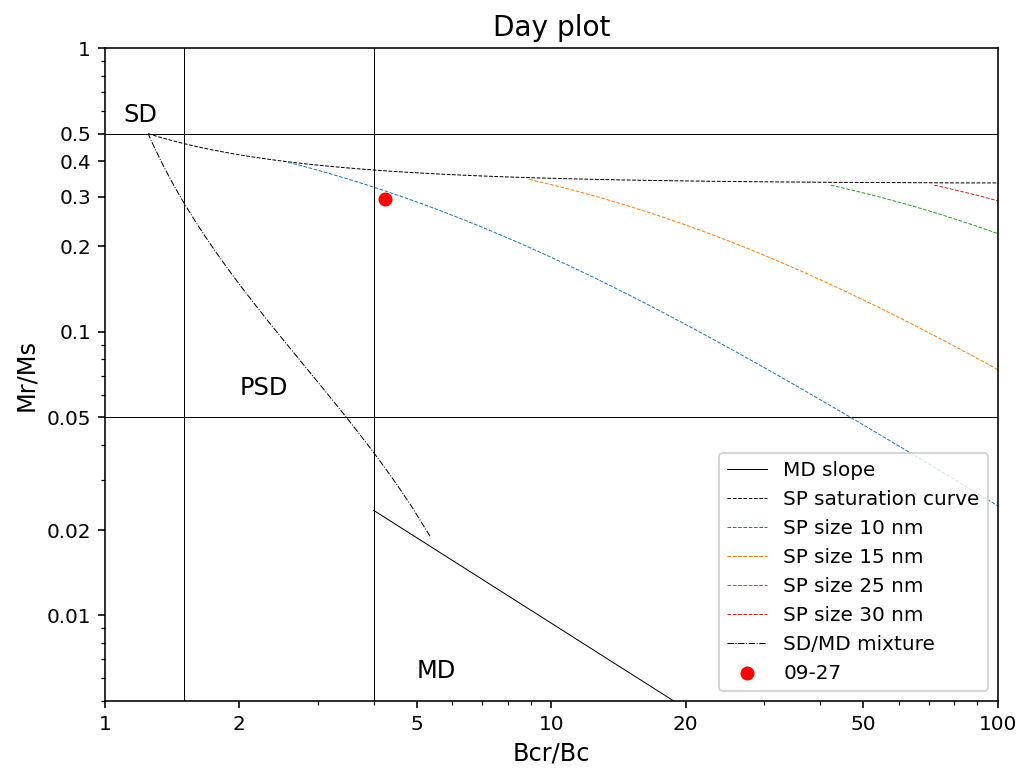

In [5]:
ax = rmag.day_plot(Mr = example_specimen_data['hyst_mr_mass'][1], 
                   Ms = example_specimen_data['hyst_ms_mass'][1],
                   Bcr = example_specimen_data['rem_bcr'][0],
                   Bc = example_specimen_data['hyst_bc'][1], 
                   color = 'red', 
                   marker = 'o', 
                   label = specimen_name, 
                   alpha=1, 
                   lc = 'black')


plt.show()

## Option 2: Plot all specimen data in a MagIC specimens data table
- Because Bcr is obtained from a backfield experiment whereas other values can be obtained from a hysteresis experiment, the data entry in the data tables are decoupled. In many cases there could be multiple entries for the same attribute for the same specimen.
- If one were to use the default approach to plot all data at once, bear in mind that the default function will simply take the average of all of the entries for the same attribute for the same specimen.

In [6]:
H_specimens = specimens[specimens['specimen'].str.contains('H')].reset_index()
H_specimens

,specimen name,citations,description,experiments,hyst_bc,hyst_bc_offset,hyst_mr_mass,hyst_ms_mass,hyst_xhf,instrument_codes,...,rem_bcr,rem_hirm_mass,rem_mr_mass,rem_sratio,rem_sratio_back,result_quality,sample,specimen,volume,weight
0,H1-0.2A,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,None,H1-0.2,H1-0.2A,0.000010,0.028482
1,H1-0.2B,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,None,H1-0.2,H1-0.2B,0.000010,0.028730
2,H1-0.2C,This study,None,IRM-VSM3-66769,0.004854,-0.003742,0.000034,0.000189,3.774000e-09,IRM-VSM3,...,NaN,NaN,NaN,NaN,NaN,g,H1-0.2,H1-0.2C,0.000001,0.004169
3,H1-0.4A,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,None,H1-0.4,H1-0.4A,0.000010,0.028457
4,H1-0.4B,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,None,H1-0.4,H1-0.4B,0.000010,0.028187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,H2-5.35c2,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,None,H2-5.3,H2-5.35c2,0.000005,0.000525
99,H2-5.75A,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,None,H2-5.7,H2-5.75A,0.000010,0.028478
100,H2-5.75B,This study,None,IRM-VSM1-4226,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,...,0.0385,0.0,0.000191,0.0,0.1,g,H2-5.7,H2-5.75B,0.000004,0.014591
101,H2-5.75B,This study,None,IRM-VSM1-4226,0.004375,0.000000,0.000191,0.001063,-1.431000e-09,IRM-VSM1,...,NaN,NaN,NaN,NaN,NaN,g,H2-5.7,H2-5.75B,0.000004,0.014591


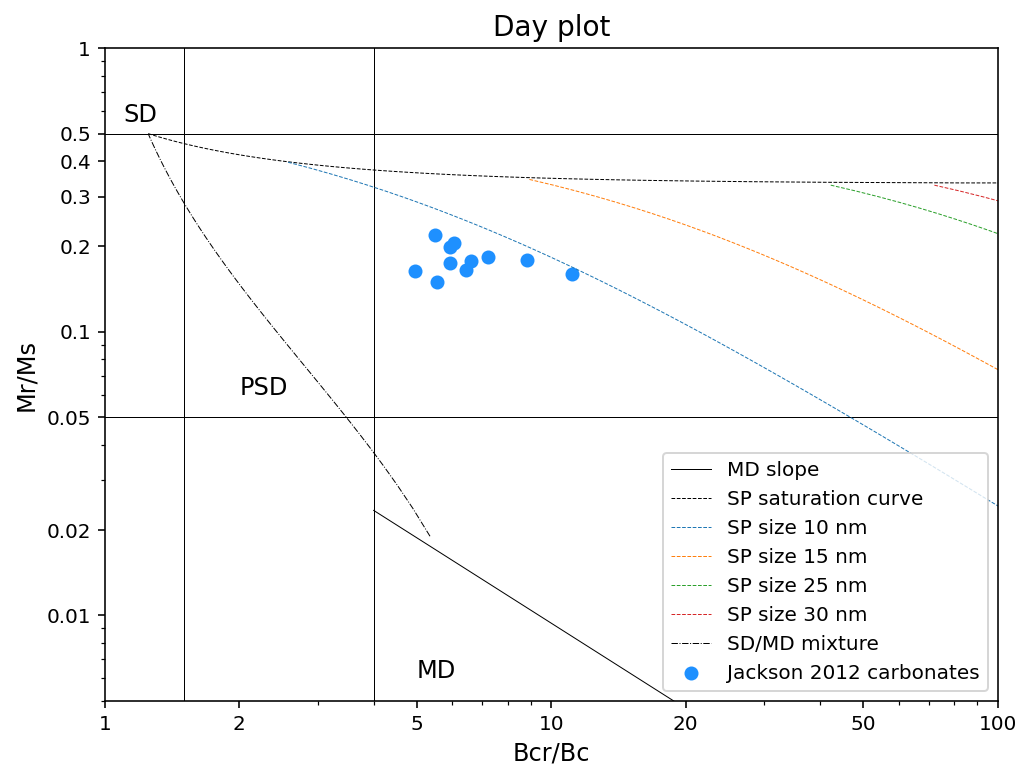

In [8]:
ax=rmag.day_plot_MagIC(H_specimens,
               by='specimen',
               Mr='hyst_mr_mass', 
               Ms='hyst_ms_mass', 
               Bcr='rem_bcr', 
               Bc='hyst_bc', 
               color = 'dodgerblue', 
               marker = 'o', 
               label = 'Jackson 2012 carbonates', 
               alpha=1, 
               lc = 'black')